In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import median_absolute_error


In [5]:
df = pd.read_csv("house_data - house_data.csv.csv")

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
#checking for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
for col in df:
    print(f"Column: {col}\n{df[col].value_counts()}\n")

Column: id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

Column: date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64

Column: price
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3625, dtype: int64

Column: bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Column: bathrooms
2.50    5380
1.00    3852
1.75

In [45]:
print(df["price"].unique().max())

print(df["price"].unique().min())

7700000.0
75000.0


In [17]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<AxesSubplot:>

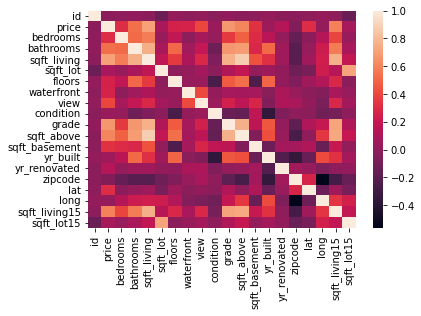

In [18]:
sns.heatmap(df.corr())

## Linear Regression

In [116]:
#splitting into input and output variables

X = df.drop(columns=["id", "price","date"])

y = df["price"]

#splitting X and y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#evaluating the model 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"the mean squared error equals", mse)
print(f"the root mean squared error equals", rmse)
print(f"the R squared value equals", r2)
print(f"the mean absolute error equals", mae)
print(f"the median absolute error equals", medae)

the mean squared error equals 41866322867.0563
the root mean squared error equals 204612.61658816715
the R squared value equals 0.7037562519873852
the mean absolute error equals 125794.89279123729
the median absolute error equals 87610.5659742956


In [114]:
#training a baseline model to evaluate the performance of the model further

baseline_prediction = np.mean(y_train)

baseline_predictions = np.full_like(y_test, fill_value=baseline_prediction)

mse_baseline = mean_squared_error(y_test, baseline_predictions)

mse_baseline

141324231125.3279

In [48]:
# The linear regression model provided a lower mse than the baseline model predicting the average prices of houses. 
# This indicates that the linear regression performs well.

## Gradient Boosting Regressor

In [117]:
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

y_pred1 = gbr.predict(X_test)

#evaluating the model 
mse_gb = mean_squared_error(y_test, y_pred1)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred1)
mae_gb = mean_absolute_error(y_test, y_pred1)
medae = median_absolute_error(y_test, y_pred1)

print(f"the mean squared error equals", mse_gb)
print(f"the root mean squared error equals", rmse_gb)
print(f"the R squared value equals", r2_gb)
print(f"the mean absolute error equals", mae_gb)
print(f"the median absolute error equals", medae)

the mean squared error equals 17983439073.48481
the root mean squared error equals 134102.34551820788
the R squared value equals 0.8727501956595829
the mean absolute error equals 78393.68308273573
the median absolute error equals 49012.00348868538


## Catboost Regressor

In [120]:
from catboost import CatBoostRegressor
catboost_regressor = CatBoostRegressor(random_state=42)

catboost_regressor.fit(X_train, y_train)

y_pred2 = catboost_regressor.predict(X_test)

#evaluating the model 
mse_cb = mean_squared_error(y_test, y_pred2)
rmse_cb = np.sqrt(mse_cb)
r2_cb = r2_score(y_test, y_pred2)
mae_cb = mean_absolute_error(y_test, y_pred2)
medae = median_absolute_error(y_test, y_pred2)

print(f"the mean squared error equals", mse_cb)
print(f"the root mean squared error equals", rmse_cb)
print(f"the R squared value equals", r2_cb)
print(f"the mean absolute error equals", mae_cb)
print(f"the median absolute error equals", medae)

Learning rate set to 0.06358
0:	learn: 349833.4018743	total: 19.8ms	remaining: 19.8s
1:	learn: 335655.4807005	total: 31.1ms	remaining: 15.5s
2:	learn: 322872.5456696	total: 41.6ms	remaining: 13.8s
3:	learn: 311140.6622661	total: 51.3ms	remaining: 12.8s
4:	learn: 299746.1738603	total: 62.2ms	remaining: 12.4s
5:	learn: 289914.2658982	total: 72.3ms	remaining: 12s
6:	learn: 280820.3420403	total: 82.7ms	remaining: 11.7s
7:	learn: 271993.2805243	total: 99.2ms	remaining: 12.3s
8:	learn: 263773.3062641	total: 117ms	remaining: 12.8s
9:	learn: 255960.3770499	total: 131ms	remaining: 13s
10:	learn: 248324.8723523	total: 145ms	remaining: 13s
11:	learn: 241840.9251440	total: 157ms	remaining: 12.9s
12:	learn: 235679.1479266	total: 186ms	remaining: 14.1s
13:	learn: 229794.6937971	total: 199ms	remaining: 14s
14:	learn: 224336.4660637	total: 213ms	remaining: 14s
15:	learn: 218343.3135094	total: 226ms	remaining: 13.9s
16:	learn: 213501.8953012	total: 237ms	remaining: 13.7s
17:	learn: 208709.8269406	total

## Xgboost regressor

In [119]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(random_state=42)

xgb_regressor.fit(X_train, y_train)

y_pred3 = xgb_regressor.predict(X_test)

#evaluating the model 
mse_xgb = mean_squared_error(y_test, y_pred3)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred3)
mae_xgb = mean_absolute_error(y_test, y_pred3)
medae = median_absolute_error(y_test, y_pred3)

print(f"the mean squared error equals", mse_xgb)
print(f"the root mean squared error equals", rmse_xgb)
print(f"the R squared value equals", r2_xgb)
print(f"the mean absolute error equals", mae_xgb)
print(f"the median absolute error equals", medae)

the mean squared error equals 13570328513.707207
the root mean squared error equals 116491.752985811
the R squared value equals 0.9039771179946059
the mean absolute error equals 67193.13003099555
the median absolute error equals 39977.015625


## Lightgbm Regressor

In [121]:
from lightgbm import LGBMRegressor
lgbm_regressor = LGBMRegressor(random_state=42)

lgbm_regressor.fit(X_train, y_train)

y_pred4 = lgbm_regressor.predict(X_test)

#evaluating the model 
mse_lgbm = mean_squared_error(y_test, y_pred4)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred4)
mae_lgbm = mean_absolute_error(y_test, y_pred4)
medae = median_absolute_error(y_test, y_pred4)

print(f"the mean squared error equals", mse_lgbm)
print(f"the root mean squared error equals", rmse_lgbm)
print(f"the R squared value equals", r2_lgbm)
print(f"the mean absolute error equals", mae_lgbm)
print(f"the median absolute error equals", medae)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2329
[LightGBM] [Info] Number of data points in the train set: 16209, number of used features: 18
[LightGBM] [Info] Start training from score 540039.050219
the mean squared error equals 15197577724.708714
the root mean squared error equals 123278.45604447159
the R squared value equals 0.8924627940175895
the mean absolute error equals 67000.33457843345
the median absolute error equals 40318.52599745471


## Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred5 = rf_regressor.predict(X_test)

#evaluating the model 
mse_rf = mean_squared_error(y_test, y_pred5)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred5)
mae_rf = mean_absolute_error(y_test, y_pred5)
medae = median_absolute_error(y_test, y_pred5)

print(f"the mean squared error equals", mse_rf)
print(f"the root mean squared error equals", rmse_rf)
print(f"the R squared value equals", r2_rf)
print(f"the mean absolute error equals", mae_rf)
print(f"the median absolute error equals", medae)

the mean squared error equals 17001261535.521936
the root mean squared error equals 130388.88578219363
the R squared value equals 0.8797000287266965
the mean absolute error equals 70345.72192883432
the median absolute error equals 38800.75
